<a href="https://colab.research.google.com/github/tjahjoe/PCVK-Genap-25-26/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

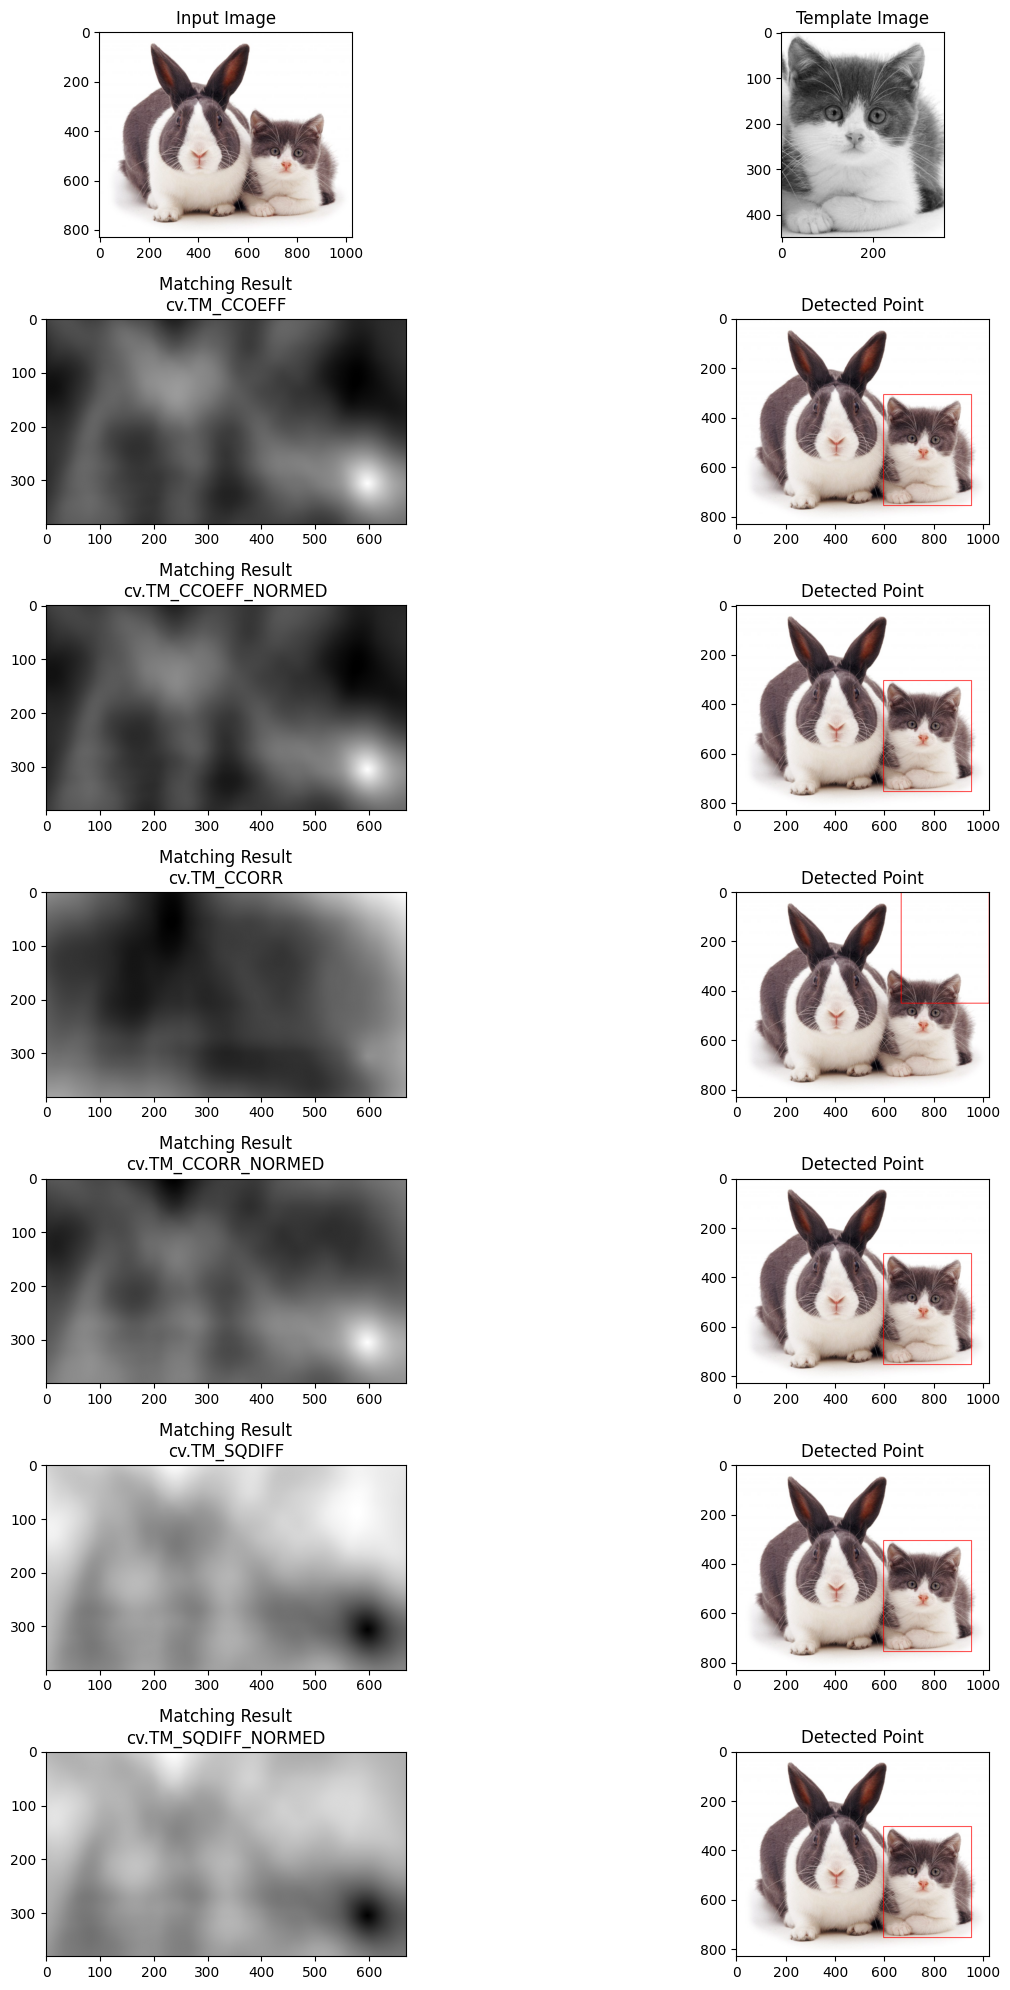

In [ ]:
# soal 2: Template Matching dengan OpenCV
img = cv.imread('cats_and_bunnies.jpg', 0)
template = cv.imread('cat2_templatejpg.jpg', 0)
h, w = template.shape

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

plt.figure(figsize=(15, 20))
plt.subplot(len(methods) + 1, 2, 1)
plt.imshow(cv.cvtColor(cv.imread('cats_and_bunnies.jpg'), cv.COLOR_BGR2RGB))
plt.title('Input Image')
plt.subplot(len(methods) + 1, 2, 2)
plt.imshow(template, cmap='gray')
plt.title('Template Image')

for i, meth in enumerate(methods):
    img2 = img.copy()
    method = eval(meth)

    res = cv.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    img_rgb_copy = cv.cvtColor(cv.imread('cats_and_bunnies.jpg'), cv.COLOR_BGR2RGB)
    cv.rectangle(img_rgb_copy, top_left, bottom_right, (255, 0, 0), 2)

    plt.subplot(len(methods) + 1, 2, (i+1)*2 + 1)
    plt.imshow(res, cmap='gray')
    plt.title(f'Matching Result\n{meth}')

    plt.subplot(len(methods) + 1, 2, (i+1)*2 + 2)
    plt.imshow(img_rgb_copy)
    plt.title('Detected Point')

plt.tight_layout()
plt.show()

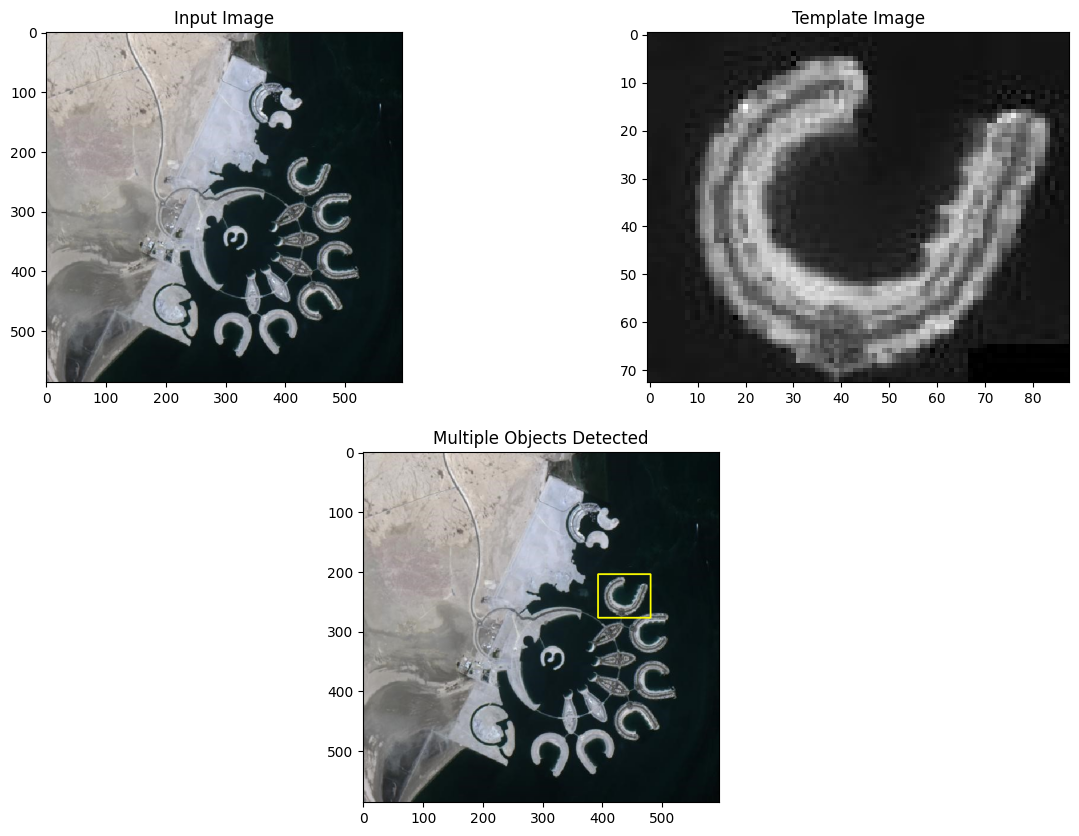

In [ ]:
# soal 3: Template Matching Manual (Multiple Object)
img_main = cv.imread('bahrain.jpg', 0)
img_template = cv.imread('bahrain-template.jpg', 0)

h_main, w_main = img_main.shape
h_temp, w_temp = img_template.shape

result_map = np.zeros((h_main - h_temp + 1, w_main - w_temp + 1))

for y in range(result_map.shape[0]):
    for x in range(result_map.shape[1]):
        roi = img_main[y:y+h_temp, x:x+w_temp]
        ssd = np.sum((img_template - roi) ** 2)
        result_map[y, x] = ssd

threshold = result_map.min() * 1.5
locations = np.where(result_map <= threshold)

img_main_color = cv.imread('bahrain.jpg')
for pt in zip(*locations[::-1]):
    cv.rectangle(img_main_color, pt, (pt[0] + w_temp, pt[1] + h_temp), (0, 255, 255), 2)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(cv.imread('bahrain.jpg'), cv.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(2, 2, 2)
plt.imshow(img_template, cmap='gray')
plt.title('Template Image')

plt.subplot(2, 1, 2)
plt.imshow(cv.cvtColor(img_main_color, cv.COLOR_BGR2RGB))
plt.title('Multiple Objects Detected')
plt.show()

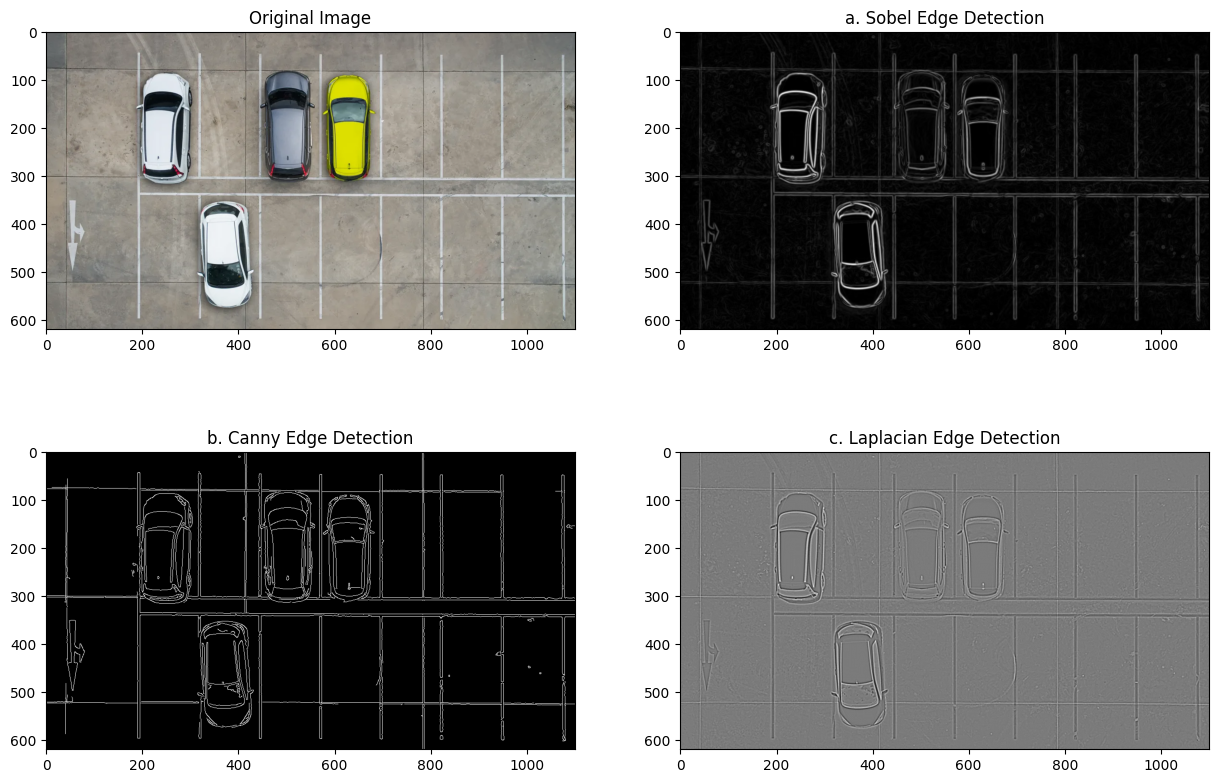

In [ ]:
# soal 4: Edge Detection
img_car = cv.imread('car-park.jpg')
gray_car = cv.cvtColor(img_car, cv.COLOR_BGR2GRAY)

blurred_car = cv.GaussianBlur(gray_car, (5, 5), 0)

sobelx = cv.Sobel(blurred_car, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(blurred_car, cv.CV_64F, 0, 1, ksize=5)
sobel_combined = cv.magnitude(sobelx, sobely)

canny_edges = cv.Canny(blurred_car, 50, 150)

laplacian_edges = cv.Laplacian(blurred_car, cv.CV_64F)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('a. Sobel Edge Detection')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('b. Canny Edge Detection')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('c. Laplacian Edge Detection')

plt.show()

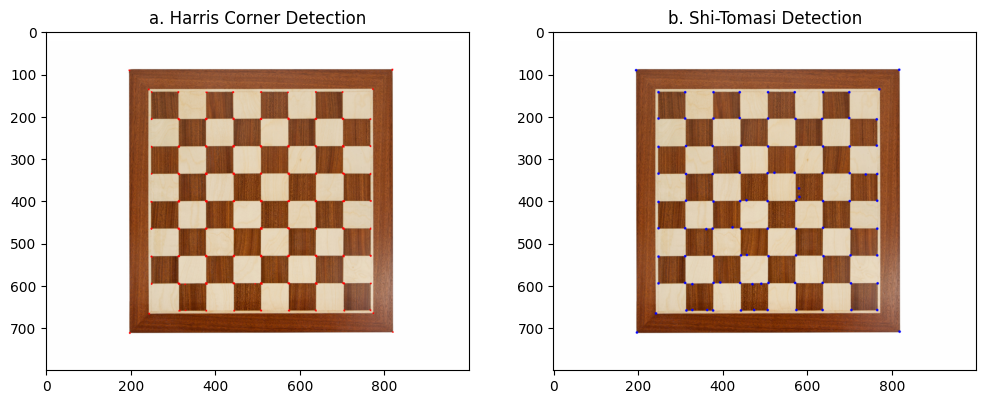

In [ ]:
# soal 5: Corner Detection
img_chess = cv.imread('chess-board.jpg')
gray_chess = cv.cvtColor(img_chess, cv.COLOR_BGR2GRAY)
gray_chess_float = np.float32(gray_chess)

dst_harris = cv.cornerHarris(gray_chess_float, 2, 3, 0.04)
dst_harris = cv.dilate(dst_harris, None)
img_harris = img_chess.copy()
img_harris[dst_harris > 0.01 * dst_harris.max()] = [0, 0, 255]

corners_shi = cv.goodFeaturesToTrack(gray_chess, 100, 0.01, 10)
corners_shi = np.int32(corners_shi)
img_shi = img_chess.copy()
for i in corners_shi:
    x, y = i.ravel()
    cv.circle(img_shi, (x, y), 3, (255, 0, 0), -1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_harris, cv.COLOR_BGR2RGB))
plt.title('a. Harris Corner Detection')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_shi, cv.COLOR_BGR2RGB))
plt.title('b. Shi-Tomasi Detection')
plt.show()

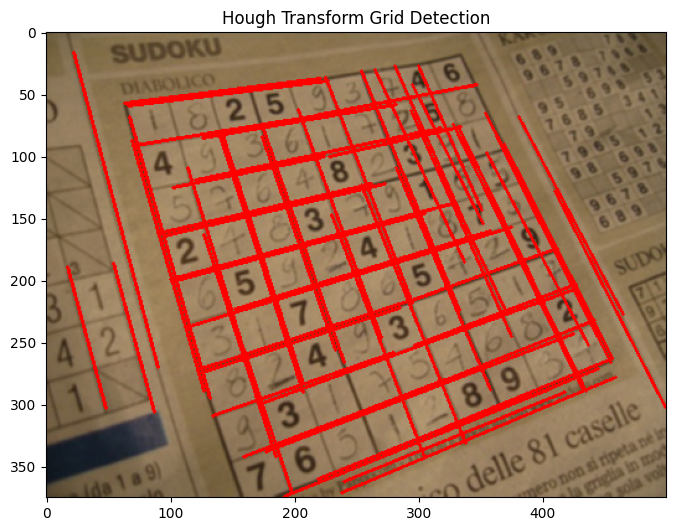

In [ ]:
# soal 6: Grid Detection (Hough Transform)
img_sudoku = cv.imread('sudoku.jpg')
gray_sudoku = cv.cvtColor(img_sudoku, cv.COLOR_BGR2GRAY)

edges = cv.Canny(gray_sudoku, 50, 150, apertureSize=3)

lines = cv.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

img_sudoku_lines = img_sudoku.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(img_sudoku_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(8, 8))
plt.imshow(cv.cvtColor(img_sudoku_lines, cv.COLOR_BGR2RGB))
plt.title('Hough Transform Grid Detection')
plt.show()

Ditemukan 219 kontur objek.


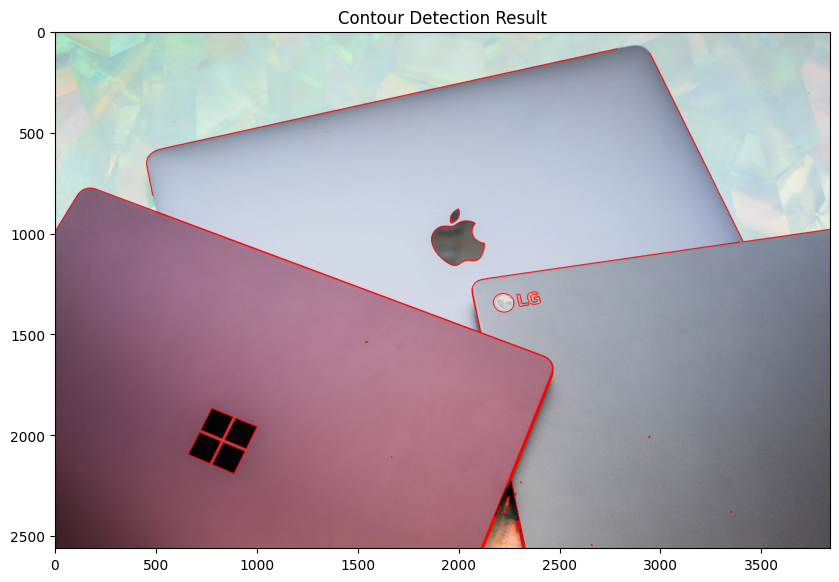

In [ ]:
# soal 7: Contour Detection
img_laptop = cv.imread('laptop.jpg')

gray_laptop = cv.cvtColor(img_laptop, cv.COLOR_BGR2GRAY)
edged_laptop = cv.Canny(gray_laptop, 50, 200)

contours, hierarchy = cv.findContours(edged_laptop, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(f"Ditemukan {len(contours)} kontur objek.")

img_contour = img_laptop.copy()
cv.drawContours(img_contour, contours, -1, (0, 0, 255), 3)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img_contour, cv.COLOR_BGR2RGB))
plt.title('Contour Detection Result')
plt.show()